In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Given Informations

# total number of layers = 4
num_layers = 4

# width of each layer
H = np.array([200,10,20,20])

# velocity of seismic wave in each layer
V = np.array([1000,1500,2000,1600,2500])

# Amplitude of source signal (0.0 to 1.0), (1.0 to -1.0), (-1.0 to 0.0)
source_amplitudes = np.concatenate((np.arange(0.0,1.0,0.1),np.arange(1.0,- 1.0,-
0.1), np.arange(-1.0,0.1,0.1),),axis=0)
# Sampling time interval
delta_t = 0.001

In [4]:
### Reflection & Transmission Coeffecient and Two-way travel time for each layer

# calculating Reflection and Transmission Coefficeints
reflection_coef = []
transmission_coef = []
for i in range(num_layers):
    v1=V[i]
    v2=V[i+1]
    rc = (v2-v1)/(v2+v1)
    rc = round(rc,3)
    tc = round(1-rc,3)
    reflection_coef.append(rc)
    transmission_coef.append(tc)

# calculating Two-way Travel times
two_way_travel_times = []
t=0
for i in range(num_layers):
    t+= 2*(H[i]/V[i])
    t=round(t,3)
    two_way_travel_times.append(t)

print(reflection_coef)
print(transmission_coef)
print(two_way_travel_times)

[0.2, 0.143, -0.111, 0.22]
[0.8, 0.857, 1.111, 0.78]
[0.4, 0.413, 0.433, 0.458]


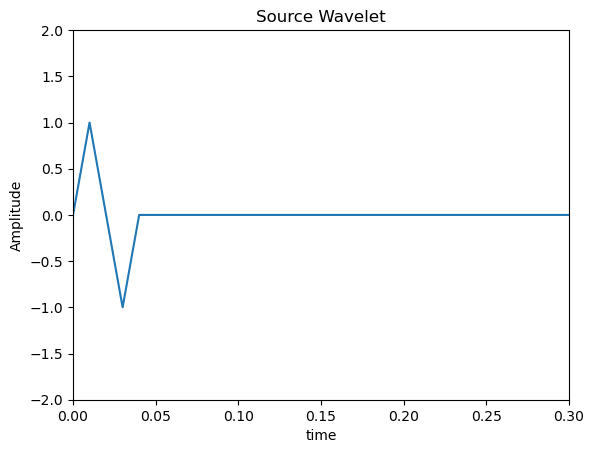

In [5]:
### Plotting Source Wavelet

# creating time sequence from 0.0s upto 0.6s, time-interval = 0.001s
time_seq = np.arange(0.0,0.6,delta_t)
# creating source wavelet (starting from t = 0.0s) with given source amplitudes
source_wavelet = [0]*len(time_seq)
for i in range(len(source_amplitudes)):
    source_wavelet[i] = source_amplitudes[i]

plt.plot(time_seq,source_wavelet)
plt.xlim([0.0,0.3])
plt.ylim([-2,2])
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Source Wavelet')
plt.show()

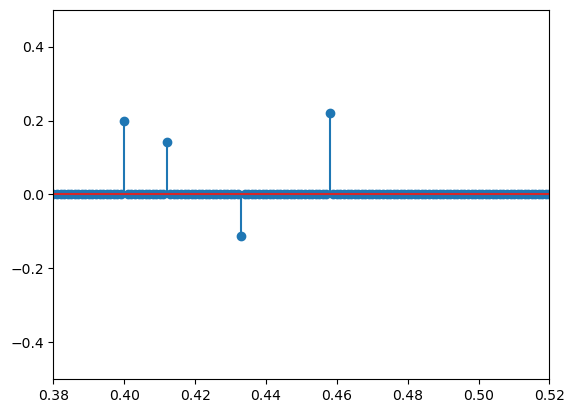

In [8]:
### Plotting Reflectivity Series

reflectivity_series = [0]*len(time_seq)
for i in range(num_layers):
    twtt = two_way_travel_times[i]
    r = reflection_coef[i]
    index = int(twtt/delta_t)
    reflectivity_series[index] = r

plt.stem(time_seq,reflectivity_series)
plt.xlim([0.38,0.52])
plt.ylim([-0.5,0.5])
plt.show()

In [9]:
## Synthetic Signal

# function for creating synthetic signal response of layer at given index
def generate_signal(index,factor):
    cur_signal = [0]*len(time_seq)
    for a in source_amplitudes:
        cur_signal[index] = a*factor
        index+=1
    return cur_signal

# generating synthetic signal for each layer
synthetic_signal = []*num_layers
tc_factor = 1
for i in range(num_layers):
    twtt = two_way_travel_times[i]
    rc = reflection_coef[i]
    tc = transmission_coef[i]
    
    index = int(twtt/delta_t)
    
    cur_signal = generate_signal(index,rc*tc_factor)
    synthetic_signal.append(cur_signal)
    
    tc_factor = tc_factor * tc * (2-tc)
    # tc - for downward direction
    # (2-tc) - for upward direction

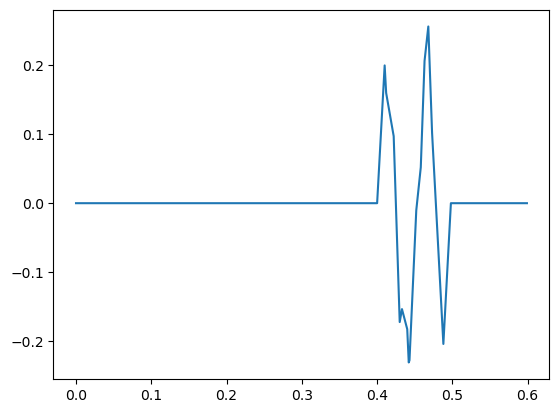

In [10]:
# overall combined synthetic signal
combined_signal = np.zeros(len(time_seq),dtype=float)

for i in range(num_layers):
    combined_signal += np.array(synthetic_signal[i])

plt.plot(time_seq,combined_signal)
plt.show()

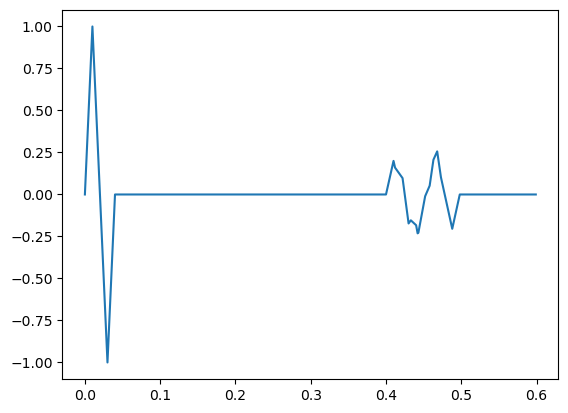

In [11]:
## Actual Received Signal

received_signal = np.array(source_wavelet) + combined_signal
plt.plot(time_seq,received_signal)
plt.show()

In [19]:
### Implementing Correlation Function

def correlate2(x1,x2):
    m=len(x1)
    n=len(x2)
    maxLag = m-1
    lags = []
    corr_value = []
    for T in range(-maxLag,maxLag+1):
        curSum=0
        for t1 in range(m):
            t2 = t1-T
            if t2<0: continue
            if t2>=n: break
        
            curSum+= (x1[t1]*x2[t2])
    
        lags.append(T)
        corr_value.append(curSum)

    lags=np.array(lags)
    corr_value = np.array(corr_value)
    return (lags,corr_value)

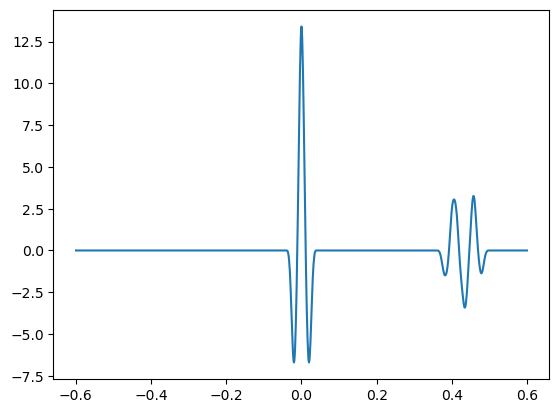

In [20]:
# Cross-Correlation of Seismic Trace with Original Source Wavelet

lags,corr_val = correlate2(received_signal,source_wavelet)
plt.plot(lags*delta_t,corr_val)
plt.show()